## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_folder = './data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

### Task A

In [4]:
us_2015 = pd.read_csv(data_folder + 'acs2015_county_data.csv')

us_2015.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


To determine the correlation of the two variables, SelfEmployed and IncomePerCap, we use a scatter plot and a correlation using pearson method. We will use the two methods at each time for the following task.

SelfEmployed vs IncomePerCap has a correlation value of : 0.0872 (pearson method) with a p value of 7.052861196511526e-07


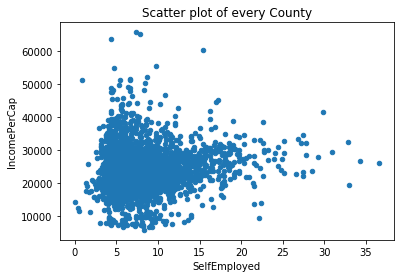

In [40]:
us_2015.plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap');
plt.title('Scatter plot of every County');

corr, pval = pearsonr(us_2015['SelfEmployed'], us_2015['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

As we can see visually, we have like two lines, one vertical and one honrizontal. The one that we are interesting, the honrizontal, is more or less flat. The correlation value that is significant has a value of 0.0872. So it's confirm the fact that there are no strong (>0.7) or moderate (>0.5) correlation. So more self-employed people doesn't mean more income per capita.

The correlation value is maybe biais by the vertical line (outliers is some way), so we will select county that have a  income per capita between the 10 and the 90 percentil to see if it changes.

In [23]:
us_2015[['IncomePerCap']].describe(percentiles = [.1, .5, 0.9])

,IncomePerCap
count,3220.000000
mean,23981.771739
std,6204.339960
min,5878.000000
10%,17635.000000
50%,23460.000000
90%,30903.000000
max,65600.000000


SelfEmployed vs IncomePerCap has a correlation value of : 0.1407 (pearson method) with a p value of 7.222858973972974e-13


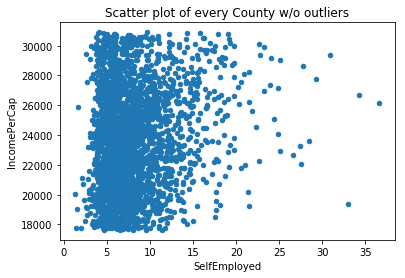

In [39]:
us_2015_wo_outliers = us_2015[(us_2015.IncomePerCap <= 30903.0) & (us_2015.IncomePerCap >= 17635.0)]
us_2015_wo_outliers.plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap');
plt.title('Scatter plot of every County w/o outliers');

corr, pval = pearsonr(us_2015_wo_outliers['SelfEmployed'], us_2015_wo_outliers['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

As we can see visually is that there are no correlation and the correlation value is bigger but still low for a moderate one.

### Task B

SelfEmployed vs IncomePerCap has a correlation value of : -0.202 (pearson method) with a p value of 0.0011881639322138852


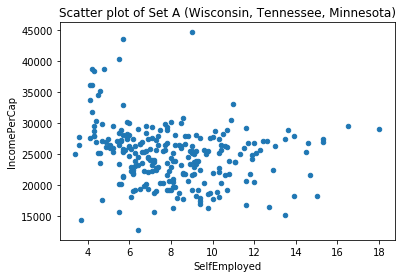

In [38]:
set_A = us_2015[(us_2015.State == 'Wisconsin') |  (us_2015.State == 'Tennessee') | (us_2015.State == 'Minnesota')]

set_A.plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap');
plt.title('Scatter plot of Set A (Wisconsin, Tennessee, Minnesota)');

corr, pval = pearsonr(set_A['SelfEmployed'], set_A['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

We see visually that we have a flat correlation and the correlation is negative so more self-employed people is correlate with less income per capita but there are again outliers that can biais the pearson method. We will do the same as before for the outliers (see Task A)

In [31]:
set_A[['IncomePerCap']].describe(percentiles = [.1, .5, 0.9])

,IncomePerCap
count,254.000000
mean,24918.066929
std,4755.868087
min,12810.000000
10%,18989.900000
50%,25327.500000
90%,29522.400000
max,44671.000000


SelfEmployed vs IncomePerCap has a correlation value of : -0.010 (pearson method) with a p value of 0.885115780444908


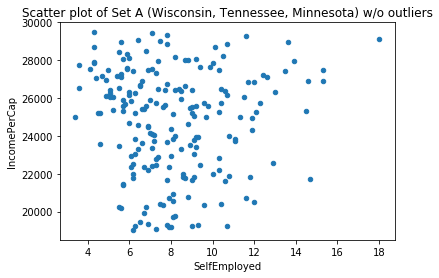

In [37]:
set_A_wo_outliers = set_A[(set_A.IncomePerCap <= 29522.4) & (set_A.IncomePerCap >= 18989.9)]
set_A_wo_outliers.plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap');
plt.title('Scatter plot of Set A (Wisconsin, Tennessee, Minnesota) w/o outliers');


corr, pval = pearsonr(set_A_wo_outliers['SelfEmployed'], set_A_wo_outliers['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

We see visually that there are no correlation at all. The correlation value is less than before but it's not significant.

### Task C

We will use Set A w/o outliers for this task so that if the outliers of the task before, the pearson method will be less biais.

SelfEmployed vs IncomePerCap has a correlation value of : -0.478 (pearson method) with a p value of 5.456176882201918e-05


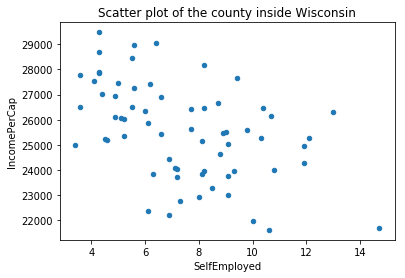

In [44]:
set_A_wo_outliers[set_A_wo_outliers.State == 'Wisconsin'].plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')
plt.title('Scatter plot of the county inside Wisconsin')

corr, pval = pearsonr(set_A_wo_outliers[set_A_wo_outliers.State == 'Wisconsin']['SelfEmployed'],
                      set_A_wo_outliers[set_A_wo_outliers.State == 'Wisconsin']['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

We see that Wisconsin has the opposit effect (visually and confirm by pearson method). More self-employed people is correlate with less income per capita. So it's not a interesting state where we can do a startup. But Winsconsin, as you will see later, has the strongest effect in the set A. 

SelfEmployed vs IncomePerCap has a correlation value of : -0.201 (pearson method) with a p value of 0.09969202334125829


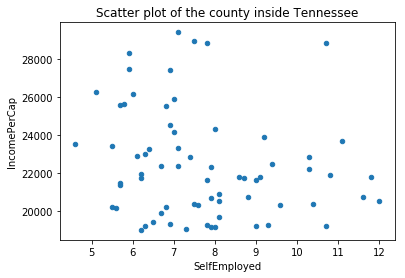

In [45]:
set_A_wo_outliers[set_A_wo_outliers.State == 'Tennessee'].plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')
plt.title('Scatter plot of the county inside Tennessee')

corr, pval = pearsonr(set_A_wo_outliers[set_A_wo_outliers.State == 'Tennessee']['SelfEmployed'],
                      set_A_wo_outliers[set_A_wo_outliers.State == 'Tennessee']['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

Tennessee as we see in the scatter plot, has more or less the same correlation that Wisnconsin. The perason method is not significant. It doesn't mean that the correlation value is wrong but we will not take it in account. Tennessee is also not an interesting state.

SelfEmployed vs IncomePerCap has a correlation value of : 0.1846 (pearson method) with a p value of 0.1288857992527367


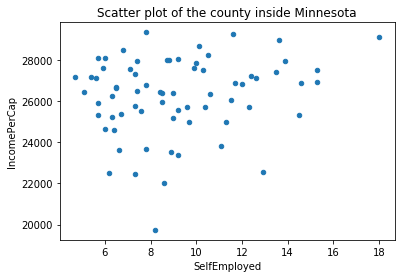

In [46]:
set_A_wo_outliers[set_A_wo_outliers.State == 'Minnesota'].plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')
plt.title('Scatter plot of the county inside Minnesota')

corr, pval = pearsonr(set_A_wo_outliers[set_A_wo_outliers.State == 'Minnesota']['SelfEmployed'],
                      set_A_wo_outliers[set_A_wo_outliers.State == 'Minnesota']['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

As we see Minnesota has a very little correlation. Again the correlation is not sgnificant. Compare with the other, Minnesota is the more interesting state to increase self-employed people. 

### Task D

SelfEmployed vs IncomePerCap has a correlation value of : -0.232 (pearson method) with a p value of 0.007607493042857412


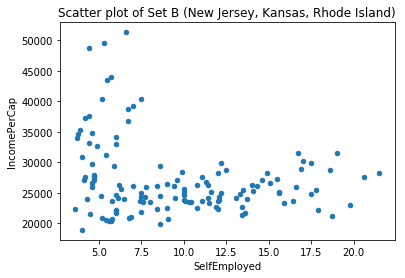

In [47]:
set_B = us_2015[(us_2015.State == 'New Jersey') |  (us_2015.State == 'Kansas') | (us_2015.State == 'Rhode Island')]

set_B.plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap');
plt.title('Scatter plot of Set B (New Jersey, Kansas, Rhode Island)');

corr, pval = pearsonr(set_B['SelfEmployed'], set_B['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

We see visually there are again two line. The honrizontal line has a little slope so it's an interessting set where we can increase sel-employed people to increase income per capita. We will see if we remove the outliers the same way as before if the correlation value that now is negative so it contredict our visual analysis will increase.

In [48]:
set_B[['IncomePerCap']].describe(percentiles = [.1, .5, 0.9])

,IncomePerCap
count,131.000000
mean,27146.549618
std,6073.105217
min,18912.000000
10%,21677.000000
50%,25484.000000
90%,34824.000000
max,51353.000000


SelfEmployed vs IncomePerCap has a correlation value of : -0.126 (pearson method) with a p value of 0.198319151345717


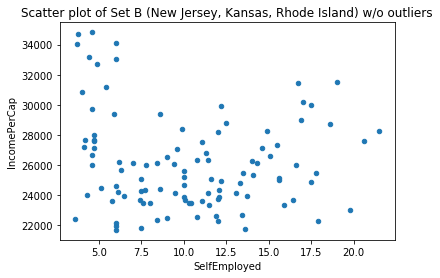

In [54]:
set_B_wo_outliers = set_B[(set_B.IncomePerCap <= 34824.0) & (set_B.IncomePerCap >= 21677.0)]

set_B_wo_outliers.plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap');
plt.title('Scatter plot of Set B (New Jersey, Kansas, Rhode Island) w/o outliers');


corr, pval = pearsonr(set_B_wo_outliers['SelfEmployed'], set_B_wo_outliers['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

Our visual analysis is the same than before. By removing the outliers, we increase the correlation value but it's now not significant. 

To be consistent with the previous task, we will take set B w/o outliers.

SelfEmployed vs IncomePerCap has a correlation value of : 0.3523 (pearson method) with a p value of 0.26138458463179826


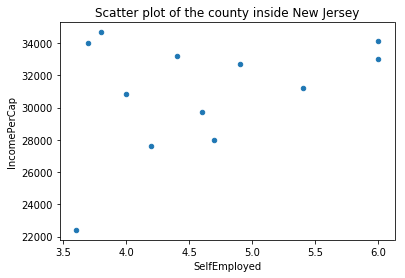

In [57]:
set_B_wo_outliers[set_B_wo_outliers.State == 'New Jersey'].plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')
plt.title('Scatter plot of the county inside New Jersey')

corr, pval = pearsonr(set_B_wo_outliers[set_B_wo_outliers.State == 'New Jersey']['SelfEmployed'],
                      set_B_wo_outliers[set_B_wo_outliers.State == 'New Jersey']['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

New Jersey has a positiv correlation as we can see with the scatter plot. It's confirm by the pearson method but it's not significant. So New Jersey is an interesting state where self-employed people may increase income per capita.

SelfEmployed vs IncomePerCap has a correlation value of : 0.2762 (pearson method) with a p value of 0.008039142284446344


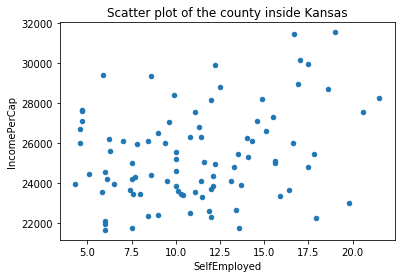

In [58]:
set_B_wo_outliers[set_B_wo_outliers.State == 'Kansas'].plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')
plt.title('Scatter plot of the county inside Kansas')

corr, pval = pearsonr(set_B_wo_outliers[set_B_wo_outliers.State == 'Kansas']['SelfEmployed'],
                      set_B_wo_outliers[set_B_wo_outliers.State == 'Kansas']['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

Kansas has a more diffuse scatter plot. So visually we can hardly detect a linear correlation but the correlation value that is positiv is significant. So we can also say that Kansas is an interesting state.

SelfEmployed vs IncomePerCap has a correlation value of : 1.0 (pearson method) with a p value of 0.0


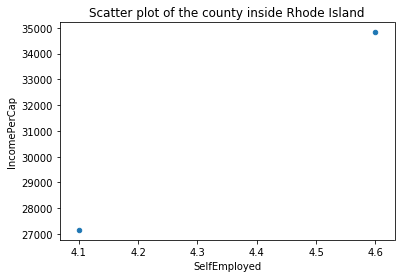

In [59]:
set_B_wo_outliers[set_B_wo_outliers.State == 'Rhode Island'].plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')
plt.title('Scatter plot of the county inside Rhode Island')

corr, pval = pearsonr(set_B_wo_outliers[set_B_wo_outliers.State == 'Rhode Island']['SelfEmployed'],
                      set_B_wo_outliers[set_B_wo_outliers.State == 'Rhode Island']['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

The ouliers that we remove may come from Rhode Island because we have only two points. It's not enough to say something consistent with these two points. We will do the same but with the outliers.

SelfEmployed vs IncomePerCap has a correlation value of : 0.9021 (pearson method) with a p value of 0.036183102015759236


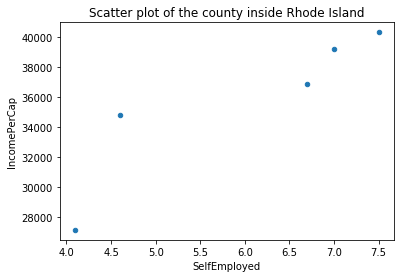

In [60]:
set_B[set_B.State == 'Rhode Island'].plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')
plt.title('Scatter plot of the county inside Rhode Island')

corr, pval = pearsonr(set_B[set_B.State == 'Rhode Island']['SelfEmployed'],
                      set_B[set_B.State == 'Rhode Island']['IncomePerCap'])
print("SelfEmployed vs IncomePerCap has a correlation value of : {} (pearson method) with a p value of {}"\
     .format(str(corr)[:6], pval))

We see that Rhode Island has a strong corrlation (that is significant). We can see visually or with the correlation value. 

So set B is the more interesting set where more self-employed people may increase income per capita. Rhode Island is the one in the set B with the bigger correlation. 

Keep in mind, that we look only between income per capita and self-employed people. It doesn't explain everything and to increase icome per capita there are maybe other factor. 

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

### TASK A
_Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding)._

In [3]:
# Loading the dataset
aac = pd.read_csv(data_folder + 'aac_intakes_outcomes.csv.zip', compression = 'zip')

# Keep relevant columns only
aac = aac[['animal_type','intake_year','intake_condition','intake_number','intake_type','sex_upon_intake',
          'age_upon_intake_(years)','time_in_shelter_days','sex_upon_outcome','age_upon_outcome_(years)',
          'outcome_type']]

aac.head()

,animal_type,intake_year,intake_condition,intake_number,intake_type,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(years),outcome_type
0,Dog,2017,Normal,1.0,Stray,Neutered Male,10.0,0.588194,Neutered Male,10.0,Return to Owner
1,Dog,2014,Normal,2.0,Public Assist,Neutered Male,7.0,1.259722,Neutered Male,7.0,Return to Owner
2,Dog,2014,Normal,3.0,Public Assist,Neutered Male,6.0,1.113889,Neutered Male,6.0,Return to Owner
3,Dog,2014,Normal,1.0,Owner Surrender,Neutered Male,10.0,4.970139,Neutered Male,10.0,Transfer
4,Dog,2013,Injured,1.0,Public Assist,Neutered Male,16.0,0.119444,Neutered Male,16.0,Return to Owner


In [4]:
# Define features x and outcome y
x = aac.drop(axis=1, labels='outcome_type')
y = aac[['outcome_type']]

# Convert outcome to either Adoption (1) or No Adoption (0)
y_adopt = y[y['outcome_type'] == 'Adoption']
y_not_adopt = y[y['outcome_type'] != 'Adoption']
y_adopt['Outcome'], y_not_adopt['Outcome'] = 1, 0
y_adopt, y_not_adopt = y_adopt[['Outcome']], y_not_adopt[['Outcome']]

y = pd.concat([y_adopt,y_not_adopt])
y.sort_index(axis=0,ascending=True, inplace = True);

# Dummy variables encoding
x = pd.get_dummies(x)

_Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome type is adoption or not._

In [5]:
def split_data(x, y, ratio, myseed=1):
    """ Split the dataset in function of the split ratio """
    
    # The data should be splited randomly in order to avoid any perturbation which
    # could be caused by the original order of the data
    np.random.seed(myseed)
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_train, index_test = indices[: index_split], indices[index_split:]
    
    # Create to splitted sets (train and test)
    x_train, x_test = x.iloc[index_train], x.iloc[index_test]
    y_train, y_test = y.iloc[index_train], y.iloc[index_test]

    return x_train, x_test, y_train, y_test

# Split the data set in train set and test set
x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8)

_Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas._

In [6]:
# Standardisation : x' = (x - mean)/std
def Standardisation(x_tr, x_te) :
    mean_tr = np.mean(x_tr, axis=0)
    std_tr = np.std(x_tr, axis=0)
    x_tr = (x_tr - mean_tr) / std_tr
    x_te = (x_te - mean_tr) / std_tr
    
    return x_tr, x_te

x_tr, x_te = Standardisation(x_tr, x_te)

x_tr.head()

,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
63044,1.199993,-0.276527,-0.036183,-0.402772,-0.048219,-0.065948,-0.768248,-1.148099,4.109571,-0.062878,...,-0.649349,-0.683996,-0.435801,-0.402206,3.264082,-0.361039,-0.373802,-0.743085,-0.686815,3.264082
48857,0.433106,-0.276527,-0.382544,-0.236281,-0.393704,-0.065948,1.301663,-1.148099,-0.243334,-0.062878,...,-0.649349,1.461997,-0.435801,-0.402206,-0.306365,-0.361039,-0.373802,1.345740,-0.686815,-0.306365
77854,1.966880,-0.276527,-0.382544,-0.402488,-0.393704,-0.065948,-0.768248,-1.148099,4.109571,-0.062878,...,-0.649349,-0.683996,-0.435801,-0.402206,3.264082,-0.361039,-0.373802,-0.743085,-0.686815,3.264082
65109,1.199993,-0.276527,-0.724159,-0.396979,-0.734458,-0.065948,-0.768248,0.871005,-0.243334,-0.062878,...,-0.649349,1.461997,-0.435801,-0.402206,-0.306365,-0.361039,2.675214,-0.743085,-0.686815,-0.306365
19219,-1.100668,-0.276527,1.002897,0.145371,0.988239,-0.065948,-0.768248,0.871005,-0.243334,-0.062878,...,-0.649349,-0.683996,2.294626,-0.402206,-0.306365,-0.361039,-0.373802,1.345740,-0.686815,-0.306365


In [7]:
def Split_Standardisation(x, y, ratio, myseed=1):
    x_train, x_test, y_train, y_test = split_data(x, y, ratio, myseed=1)
    x_train, x_test = Standardisation(x_train, x_test)
    
    return x_train, x_test, y_train, y_test

### TASK B

_Train a logistic regression classifier on your training set._

In [8]:
logistic = LogisticRegression(solver='newton-cg')

In [9]:
logistic.fit(x_tr, y_tr);

_Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix._

In [10]:
def predict_labels(probas, threshold = 0.5):
    """ Dichotomic classification of prediction, given a specific threshold and raw probabilities. """
    
    probas[np.where(probas <= threshold)] = 0
    probas[np.where(probas > threshold)] = 1
    
    return probas

# Establish the predicted output for the test set thanks to the logistic regression trained on train set
pred = predict_labels(logistic.predict_proba(x_te))

In [11]:
def confusion_matrix(pred, y):
    """ Compare pred and y in order to determine the values of the confusion matrix """
    
    df_pred = pd.DataFrame({'Prediction':pred[:,1]})
    df = df_pred.join(y)
    tp = len(df[(df.Prediction == 1) & (df.Outcome == 1)]) # True positive
    tn = len(df[(df.Prediction == 0) & (df.Outcome == 0)]) # True negative
    fp = len(df[(df.Prediction == 1) & (df.Outcome == 0)]) # False positive
    fn = len(df[(df.Prediction == 0) & (df.Outcome == 1)]) # False negative
    
    return tp, tn, fp, fn

# Establish the confusion matrix to check the efficiency of the model
tp, tn, fp, fn = confusion_matrix(pred, y_te)
confusion = {'Pred = 0': {'y = 1' : fn, 'y = 0' : tn}, 'Pred = 1' : {'y = 1' : tp, 'y = 0' : fp} }
df_confusion = pd.DataFrame.from_dict(confusion)
df_confusion

,Pred = 0,Pred = 1
y = 0,1104,939
y = 1,622,533


Where 1 means 'Adoption' and 0 means 'No Adoption'

_Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class._

In [12]:
def get_stats(tp, tn, fp, fn):
    ''' Display accuracy, precision, recall and f1-score, given confusion matrix values'''
    
    # Accuracy = TP+TN/TP+FP+FN+TN
    if (tp+fp+fn+tn) > 0:
        accuracy = (tp+tn)/(tp+fp+fn+tn)
    else :
        accurancy = 0
        
    # Precision = TP/TP+FP (respectively TN/TN+FN)
    if (tp+fp) > 0:
        precision_pos = tp/(tp+fp)
    else :
        precision_pos = 0
    if (tn+fn) > 0:
        precision_neg = tn/(tn+fn)
    else :
        precision_neg = 0
        
    # Recall = TP/TP+FN (respectively TN/TN+FP)
    if (tp+fn) > 0:
        recall_pos = tp/(tp+fn)
    else : 
        recall_pos = 0
    if (tn+fp) > 0:
        recall_neg = tn/(tn+fp)
    else :
        recall_neg = 0
        
    # F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    if (recall_pos+precision_pos) > 0:
        f1_score_pos = 2*(recall_pos*precision_pos)/(recall_pos+precision_pos)
    else :
        f1_score_pos = 0
    if (recall_neg+precision_neg) > 0:
        f1_score_neg = 2*(recall_neg*precision_neg)/(recall_neg+precision_neg)
    else :
        f1_score_neg = 0
     
    return accuracy, precision_pos, precision_neg, recall_pos, recall_neg, f1_score_pos, f1_score_neg

accuracy, precision_pos, precision_neg, recall_pos, recall_neg, f1_score_pos, f1_score_neg = get_stats(tp, tn, fp, fn)

# Display stats for threshold at 0.5
print(" Accuracy : {}\n Precision (positive): {}\n Precision (negative): {}".\
          format(str(accuracy)[:6],str(precision_pos)[:6],str(precision_neg)[:6]))
print(" Recall (positive): {}\n Recall (negative): {}\n F1 Score (positive): {}\n F1 Score (negative): {}".\
          format(str(recall_pos)[:6],str(recall_neg)[:6],str(f1_score_pos)[:6],str(f1_score_neg)[:6]))

 Accuracy : 0.5118
 Precision (positive): 0.3620
 Precision (negative): 0.6396
 Recall (positive): 0.4614
 Recall (negative): 0.5403
 F1 Score (positive): 0.4057
 F1 Score (negative): 0.5858


_Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold._

In [13]:
thresholds = np.linspace(0,1-1e-9,999)
accuracies, precisions_pos, recalls_pos, f1_scores_pos = [], [], [], []
precisions_neg, recalls_neg, f1_scores_neg = [], [], []

for threshold in thresholds:
    tp, tn, fp, fn = confusion_matrix(predict_labels(logistic.predict_proba(x_te), threshold), y_te)
    a, b, c, d, e, f, g = get_stats(tp, tn, fp, fn)
    accuracies.append(a)
    precisions_pos.append(b)
    precisions_neg.append(c)
    recalls_pos.append(d)
    recalls_neg.append(e)
    f1_scores_pos.append(f)
    f1_scores_neg.append(g)
    
stats = {
    'Threshold' : thresholds,
    'Accuracy' : accuracies,
    'Precision (positive)' : precisions_pos,
    'Precision (negative)' : precisions_neg,
    'Recall (positive)' : recalls_pos,
    'Recall (negative)' : recalls_neg,
    'F1_Scores (positive)' : f1_scores_pos,
    'F1_Scores (negative)' : f1_scores_neg
}

df_stats = pd.DataFrame.from_dict(stats)

Now we will plot the Accuracy, precision, recall and F1_score in function of the threshold. For this plot, we will use color-blind friendly representation. In order to allow a better visualization, we will first represent these values with respect to the positive class and with respect to the negative class separately.

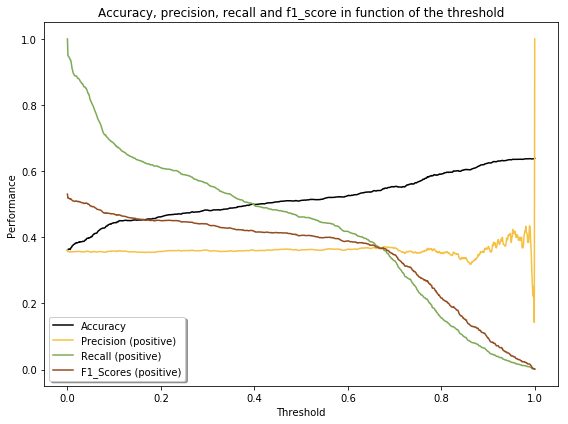

In [20]:
# Plot the accuracy, precision, recall and f1_score in function of the threshold
y1_plot = df_stats['Accuracy'].values
y2_plot = df_stats['Precision (positive)'].values
y4_plot = df_stats['Recall (positive)'].values
y6_plot = df_stats['F1_Scores (positive)'].values
x_plot = df_stats['Threshold'].values

fig, ax = plt.subplots(figsize=(8, 6))
index = range(len(y1_plot))

# Plot each parameter with color-blind friendly colors
ax.plot(x_plot, y1_plot, label='Accuracy', color='#000000')
ax.plot(x_plot, y2_plot, label='Precision (positive)', color='#F6C143')
ax.plot(x_plot, y4_plot, label='Recall (positive) ', color='#7EAA55')
ax.plot(x_plot, y6_plot, label='F1_Scores (positive)', color='#944C20')

# Aesthetic adjustments
ax.legend(shadow=True)
ax.set_xlabel('Threshold')
ax.set_ylabel('Performance')
ax.set_title('Accuracy, precision, recall and f1_score in function of the threshold')
fig.tight_layout()

plt.savefig("Performance_threshold")
plt.show()

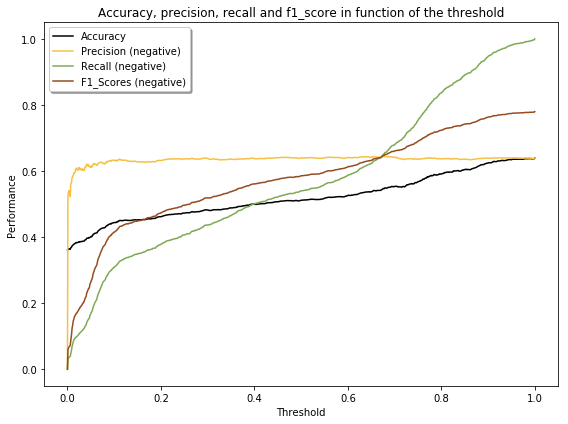

In [21]:
# Plot the accuracy, precision, recall and f1_score in function of the threshold
y1_plot = df_stats['Accuracy'].values
y3_plot = df_stats['Precision (negative)'].values
y5_plot = df_stats['Recall (negative)'].values
y7_plot = df_stats['F1_Scores (negative)'].values
x_plot = df_stats['Threshold'].values

fig, ax = plt.subplots(figsize=(8, 6))
index = range(len(y1_plot))

# Plot each parameter with color-blind friendly colors
ax.plot(x_plot, y1_plot, label='Accuracy', color='#000000')
ax.plot(x_plot, y3_plot, label='Precision (negative)', color='#F6C143')
ax.plot(x_plot, y5_plot, label='Recall (negative)', color='#7EAA55')
ax.plot(x_plot, y7_plot, label='F1_Scores (negative)', color='#944C20')

# Aesthetic adjustments
ax.legend(shadow=True)
ax.set_xlabel('Threshold')
ax.set_ylabel('Performance')
ax.set_title('Accuracy, precision, recall and f1_score in function of the threshold')
fig.tight_layout()

plt.savefig("Performance_threshold")
plt.show()

_The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning._

We would use recall. Indeed, recall positive (TP/TP+FN) has the advantage to emphasize the importance of false negative in the computation. For ethical reasons, we want to minimize the number of animals who are slept, but who would have been adopted if they were not. This means, we want to minimize the number of false negative. To determine now precisely the threshold, it will depend on the capacity of the animal shelter.

### TASK C
_Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30._

First, we create a function which will iteratively remove the worst features until reaching the asked number of features.

In [83]:
def greedy_backward_selection(k, n, x, y):
    ''' Only keep the k most important coefs for logistic regression on x '''
    x_ = x
    iterations = n-k
    
    # As the columns were standardized, we can just remove the smaller weights each time
    for j in range(iterations):
        x_tr_, x_te_, y_tr_, y_te_ = Split_Standardisation(x_, y, 0.8)
        logistic = LogisticRegression(solver='newton-cg')
        logistic.fit(x_tr_, y_tr_)
        x_ = x_.drop(axis=1, labels=x_.columns[np.argmin(abs(logistic.coef_[0]))])
        
    return x_

Then, we implement cross validation, who is able to check the accuracy of the model by taking each time only a part of the data as testing set and the rest as training set, and then go on and take another part as testing set and the rest as training set, etc. until each part of the set has been once (and only once) considered as the testing set and N-1 time as the training set (where N is the number of fold, i.e the number of parts in which you divided you set).

In [13]:
def form_k_indices(y, k_fold=5, seed=12):
    """ Build k indices for k-fold (5-fold by default) """
    
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    
    return np.array(k_indices)

def cross_validation(x, y, k_indices, k, threshold=0.5):
    """ Return the recall of the logistic regression """
    
    # Get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te_, y_tr_ = y.iloc[te_indice], y.iloc[tr_indice]
    x_te_, x_tr_ = x.iloc[te_indice], x.iloc[tr_indice]
    
    x_tr_, x_te_ = Standardisation(x_tr_, x_te_)

    # Perform logistic regression on the cross-validation set
    logistic = LogisticRegression(solver='newton-cg')
    logistic.fit(x_tr_, y_tr_)
    
    # Establish prediction on training set
    pred = predict_labels(logistic.predict_proba(x_tr_), threshold)
    
    # Compute confusion matrix values
    tp, tn, fp, fn = confusion_matrix(pred, y_tr_)
    
    # Evaluate performance with recall indicator
    a, b, c, d, e, f, g = get_stats(tp, tn, fp, fn)
    
    # a, b, c, d, e, f, g = accuracy, precision_pos, precision_neg, recall_pos, recall_neg, f1_score_pos, f1_score_neg

    return a, b, c, d, e, f, g 

Here, we split the data in 5 folds and then perform cross validation of it.

In [33]:
k_s = [1, 5, 10, 15, 20, 25, 30]

# Split data in 5-fold
k_indices = form_k_indices(y)
performance = []
k_fold = 5
N_features = len(logistic.coef_[0])

for k_ in k_s:
    x_ = greedy_backward_selection(k_, N_features, x, y)
    
    accuracies, precisions_pos, recalls_pos, f1_scores_pos = [], [], [], []
    precisions_neg, recalls_neg, f1_scores_neg = [], [], []    
    
    # Cross validation
    for k in range(k_fold):
        a, b, c, d, e, f, g = cross_validation(x_, y, k_indices, k)
        accuracies.append(a)
        precisions_pos.append(b)
        precisions_neg.append(c)
        recalls_pos.append(d)
        recalls_neg.append(e)
        f1_scores_pos.append(f)
        f1_scores_neg.append(g)
    
    performance.append([np.mean(accuracies), np.mean(precisions_pos), np.mean(precisions_neg),
                        np.mean(recalls_pos), np.mean(recalls_neg), np.mean(f1_scores_pos),
                        np.mean(f1_scores_neg)])

In [34]:
p = np.asarray(performance).T

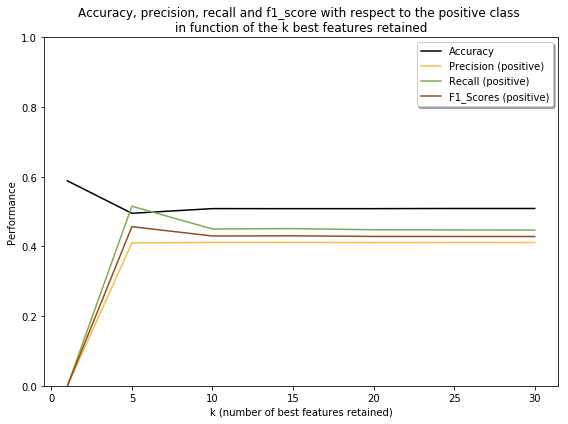

In [122]:
# Plot the accuracy, precision, recall and f1_score in function of the threshold
y1_plot, y2_plot, y3_plot, y4_plot = p[0], p[1], p[3], p[5]
x_plot = k_s

fig, ax = plt.subplots(figsize=(8, 6))
index = range(len(y1_plot))

# Plot each parameter with color-blind friendly colors
ax.plot(x_plot, y1_plot, label='Accuracy', color='#000000')
ax.plot(x_plot, y2_plot, label='Precision (positive)', color='#F6C143')
ax.plot(x_plot, y3_plot, label='Recall (positive)', color='#7EAA55')
ax.plot(x_plot, y4_plot, label='F1_Scores (positive)', color='#944C20')

# Aesthetic adjustments
ax.legend(shadow=True)
ax.set_xlabel('k (number of best features retained)')
ax.set_ylabel('Performance')

ax.set_title('Accuracy, precision, recall and f1_score with respect to the positive class \n' +
             'in function of the k best features retained')
fig.tight_layout()

plt.ylim(0,1)

plt.savefig("Performance_k")
plt.show()

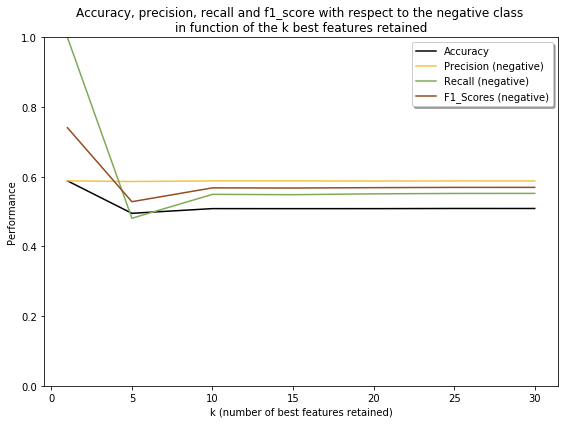

In [123]:
# Plot the accuracy, precision, recall and f1_score in function of the threshold
y1_plot, y2_plot, y3_plot, y4_plot = p[0], p[2], p[4], p[6]
x_plot = k_s

fig, ax = plt.subplots(figsize=(8, 6))
index = range(len(y1_plot))

# Plot each parameter with color-blind friendly colors
ax.plot(x_plot, y1_plot, label='Accuracy', color='#000000')
ax.plot(x_plot, y2_plot, label='Precision (negative)', color='#F6C143')
ax.plot(x_plot, y3_plot, label='Recall (negative)', color='#7EAA55')
ax.plot(x_plot, y4_plot, label='F1_Scores (negative)', color='#944C20')

# Aesthetic adjustments
ax.legend(shadow=True)
ax.set_xlabel('k (number of best features retained)')
ax.set_ylabel('Performance')
ax.set_title('Accuracy, precision, recall and f1_score with respect to the negative class \n' +
             'in function of the k best features retained')
fig.tight_layout()

plt.ylim(0,1)

plt.savefig("Performance_k")
plt.show()

_Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption._

We choosed previously to rely on recall positive, for ethical reasons. From this table, we can see that recall positive performance is best when retaining only the k = 5 best features based on the training set.

In [124]:
x_ = greedy_backward_selection(5, N_features, x, y)
x_.columns

Index(['age_upon_intake_(years)', 'time_in_shelter_days',
       'age_upon_outcome_(years)', 'sex_upon_outcome_Neutered Male',
       'sex_upon_outcome_Spayed Female'],
      dtype='object')

In [125]:
logistic = LogisticRegression(solver='newton-cg')
x_tr_, x_te_, y_tr_, y_te_ = Split_Standardisation(x_, y, 0.8)
logistic.fit(x_tr_, y_tr_)
logistic.coef_

array([[-2.15648032,  0.9346922 ,  1.43845621,  1.53546758,  1.5918927 ]])

* The age of the animal at the time of the intake decreases the probality of adoption but the age of the animal when it left increases the probability
* The number of days in the animal shelter increases the probility
* When the female animal was spayed or the male animal was neutered at the time of the outcome, the probability of adoption increases



### Task D

_Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "_n_estimators" _and the max depth of the trees "_max_depth".

In [14]:
def crossvalidation_RandomForest(x, y, estimator, depth, k_indices, k, threshold=0.5):
    
    # Get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te_, y_tr_ = y.iloc[te_indice], y.iloc[tr_indice]
    x_te_, x_tr_ = x.iloc[te_indice], x.iloc[tr_indice]
    
    x_tr_, x_te_ = Standardisation(x_tr_, x_te_)
    
    # Perform RandomForest
    forest = RandomForestClassifier(n_estimators=estimator, max_depth=depth, criterion='entropy')
    forest.fit(x_tr_, y_tr_.Outcome)
    
    # Establish prediction on training set
    pred = predict_labels(forest.predict_proba(x_tr_), threshold)
    
    # Compute confusion matrix values
    tp, tn, fp, fn = confusion_matrix(pred, y_tr_)
    
    # Evaluate performance with recall indicator
    a, b, c, d, e, f, g = get_stats(tp, tn, fp, fn)
    
    # a, b, c, d, e, f, g = accuracy, precision_pos, precision_neg, recall_pos, recall_neg, f1_score_pos, f1_score_neg

    return a, b, c, d, e, f, g
    

We will generate RandomForest with an entropy criterion so it will split according to information gain.

In [31]:
# Random Forest Cross validation and hyperparameter selection
max_tree = 100
estimators = np.linspace(1, max_tree, max_tree)

max_depth = 10
depths = np.linspace(1, max_depth, max_depth)

k_fold = 5

m_accuracies, m_precisions_pos, m_recalls_pos, m_f1_scores_pos = [], [], [], []
m_precisions_neg, m_recalls_neg, m_f1_scores_neg = [], [], []

k_indices = form_k_indices(y)

for estimator in estimators:
    d_accuracies, d_precisions_pos, d_recalls_pos, d_f1_scores_pos = [], [], [], []
    d_precisions_neg, d_recalls_neg, d_f1_scores_neg = [], [], []
    
    for depth in depths :
        accuracies, precisions_pos, recalls_pos, f1_scores_pos = [], [], [], []
        precisions_neg, recalls_neg, f1_scores_neg = [], [], []
        
        for k in range(k_fold):
            a, b, c, d, e, f, g  = crossvalidation_RandomForest(x, y, int(estimator), int(depth), k_indices, k)
            accuracies.append(a)
            precisions_pos.append(b)
            precisions_neg.append(c)
            recalls_pos.append(d)
            recalls_neg.append(e)
            f1_scores_pos.append(f)
            f1_scores_neg.append(g)
            
        d_accuracies.append(np.mean(accuracies))
        d_precisions_pos.append(np.mean(precisions_pos))
        d_precisions_neg.append(np.mean(precisions_neg))
        d_recalls_pos.append(np.mean(recalls_pos))
        d_recalls_neg.append(np.mean(recalls_neg))
        d_f1_scores_pos.append(np.mean(f1_scores_pos))
        d_f1_scores_neg.append(np.mean(f1_scores_neg))
        
    m_accuracies.append(d_accuracies)
    m_precisions_pos.append(d_precisions_pos)
    m_precisions_neg.append(d_precisions_neg)
    m_recalls_pos.append(d_recalls_pos)
    m_recalls_neg.append(d_recalls_neg)
    m_f1_scores_pos.append(d_f1_scores_pos)
    m_f1_scores_neg.append(d_f1_scores_neg)
    

m_accuracies = np.matrix(m_accuracies)
m_precisions_pos = np.matrix(m_precisions_pos)
m_precisions_neg = np.matrix(m_precisions_neg)
m_recalls_pos = np.matrix(m_recalls_pos)
m_recalls_neg = np.matrix(m_recalls_neg)
m_f1_scores_pos = np.matrix(m_f1_scores_pos)
m_f1_scores_neg = np.matrix(m_f1_scores_neg)

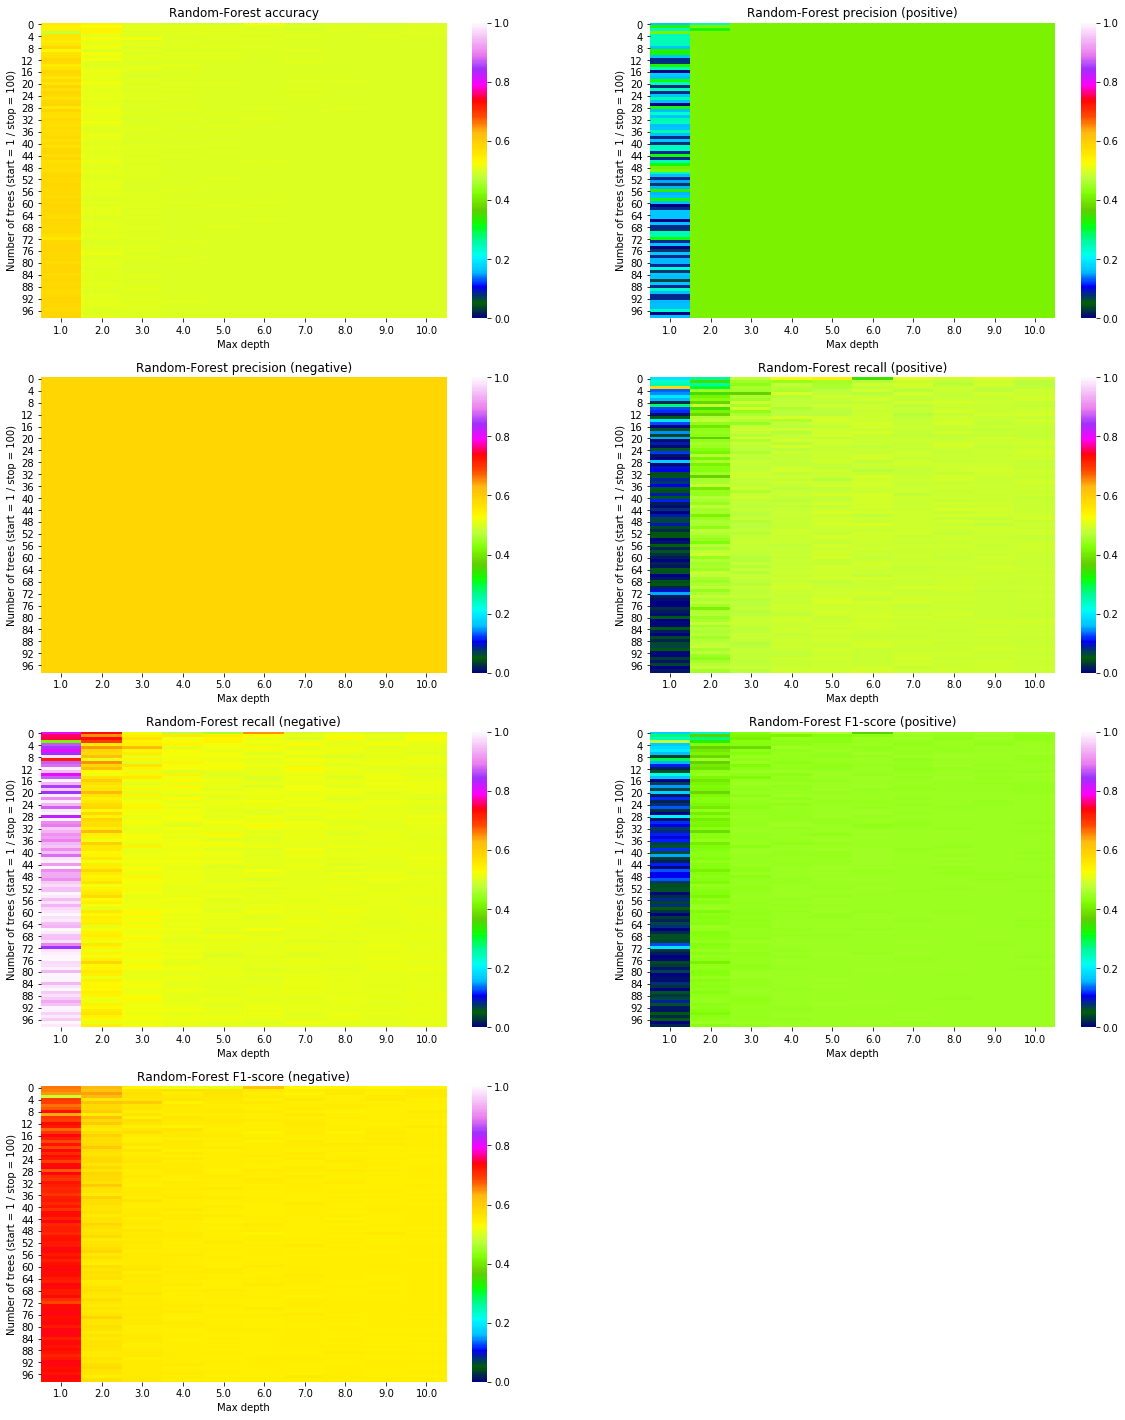

In [26]:
# Plot each matrixes

plt.figure(figsize=(20, 25))

plt.subplot(4, 2, 1)
fig = sns.heatmap(m_accuracies, xticklabels=depths, yticklabels='auto', vmin=0, vmax=1, cmap="gist_ncar", center = 0.5)
fig.set_title("Random-Forest accuracy");
fig.set_xlabel("Max depth");
fig.set_ylabel("Number of trees (start = 1 / stop = 100)");

plt.subplot(4, 2, 2)
fig = sns.heatmap(m_precisions_pos, xticklabels=depths, yticklabels='auto', vmin=0, vmax=1, cmap="gist_ncar", center = 0.5)
fig.set_title("Random-Forest precision (positive)");
fig.set_xlabel("Max depth");
fig.set_ylabel("Number of trees (start = 1 / stop = 100)");

plt.subplot(4, 2, 3)
fig = sns.heatmap(m_precisions_neg, xticklabels=depths, yticklabels='auto', vmin=0, vmax=1, cmap="gist_ncar", center = 0.5)
fig.set_title("Random-Forest precision (negative)");
fig.set_xlabel("Max depth");
fig.set_ylabel("Number of trees (start = 1 / stop = 100)");

plt.subplot(4, 2, 4)
fig = sns.heatmap(m_recalls_pos, xticklabels=depths, yticklabels='auto', vmin=0, vmax=1, cmap="gist_ncar", center = 0.5)
fig.set_title("Random-Forest recall (positive)");
fig.set_xlabel("Max depth");
fig.set_ylabel("Number of trees (start = 1 / stop = 100)");

plt.subplot(4, 2, 5)
fig = sns.heatmap(m_recalls_neg, xticklabels=depths, yticklabels='auto', vmin=0, vmax=1, cmap="gist_ncar", center = 0.5)
fig.set_title("Random-Forest recall (negative)");
fig.set_xlabel("Max depth");
fig.set_ylabel("Number of trees (start = 1 / stop = 100)");

plt.subplot(4, 2, 6)
fig = sns.heatmap(m_f1_scores_pos, xticklabels=depths, yticklabels='auto',vmin=0, vmax=1, cmap="gist_ncar", center = 0.5)
fig.set_title("Random-Forest F1-score (positive)");
fig.set_xlabel("Max depth");
fig.set_ylabel("Number of trees (start = 1 / stop = 100)");

plt.subplot(4, 2, 7)
fig = sns.heatmap(m_f1_scores_neg, xticklabels=depths, yticklabels='auto', vmin=0, vmax=1, cmap="gist_ncar", center = 0.5)
fig.set_title("Random-Forest F1-score (negative)");
fig.set_xlabel("Max depth");
fig.set_ylabel("Number of trees (start = 1 / stop = 100)");

plt.show()

As we can see, a depth more than one tend to be uniform in each metric. According to our metric of reference, recall positive, we can see that with a value of 0.583 the best hyperparameters are : 4 trees with a depth of 1. We could go above 100 trees but it seems that the recall positive will not increase.

To evaluate the performance of the Linear Regression with as we saw the `age_upon_intake_(years)`, `time_in_shelter_days`,
       `age_upon_outcome_(years)`, `sex_upon_outcome_Neutered Male`,
       `sex_upon_outcome_Spayed Female` as features and of the RandomForest with 4 estimators with a depth max of 1 , we will do a 10-fold cross validation. 

In [126]:
k_fold = 10
k_indices = form_k_indices(y, k_fold = k_fold)

RandomForest_train, RandomForest_test = [], []
Linear_train, Linear_test = [], []

columns = ['age_upon_intake_(years)', 'time_in_shelter_days',
       'age_upon_outcome_(years)', 'sex_upon_outcome_Neutered Male',
       'sex_upon_outcome_Spayed Female']

for k in range(k_fold):
    # Get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te_, y_tr_ = y.iloc[te_indice], y.iloc[tr_indice]
    x_te_, x_tr_ = x.iloc[te_indice], x.iloc[tr_indice]
    
    x_tr_, x_te_ = Standardisation(x_tr_, x_te_)
    
    #Linear
    logistic = LogisticRegression(solver='newton-cg')
    logistic.fit(x_tr_[columns], y_tr_)
    
    pred_train = predict_labels(logistic.predict_proba(x_tr_[columns]), 0.5)
    tp, tn, fp, fn = confusion_matrix(pred_train, y_tr_)
    a, b, c, d, e, f, g = get_stats(tp, tn, fp, fn)
    Linear_train.append(d) #append recall positiv
    
    pred_test = predict_labels(logistic.predict_proba(x_te_[columns]), 0.5)
    tp, tn, fp, fn = confusion_matrix(pred_test, y_te_)
    a, b, c, d, e, f, g = get_stats(tp, tn, fp, fn)
    Linear_test.append(d) #append recall positiv
    
    #RandomForest
    forest = RandomForestClassifier(n_estimators=4 , max_depth= 1, criterion='entropy')
    forest.fit(x_tr_, y_tr_.Outcome)
    
    pred_train = predict_labels(forest.predict_proba(x_tr_), 0.5)
    tp, tn, fp, fn = confusion_matrix(pred_train, y_tr_)
    a, b, c, d, e, f, g = get_stats(tp, tn, fp, fn)
    RandomForest_train.append(d) #append recall positiv
    
    pred_test = predict_labels(forest.predict_proba(x_te_), 0.5)
    tp, tn, fp, fn = confusion_matrix(pred_test, y_te_)
    a, b, c, d, e, f, g = get_stats(tp, tn, fp, fn)
    RandomForest_test.append(d) #append recall positiv
    
    

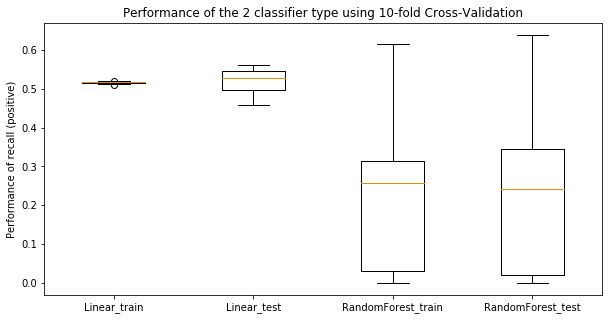

In [148]:
data = [Linear_train, Linear_test, RandomForest_train, RandomForest_test]
plt.figure(figsize=(10, 5))
plt.boxplot(data,labels = ['Linear_train', 'Linear_test', 'RandomForest_train', 'RandomForest_test']);
plt.ylabel('Performance of recall (positive)');
plt.title('Performance of the 2 classifier type using 10-fold Cross-Validation');

As we can see, Linear Regression with 5 features has a higher performance according to our metric of reference (recall positive for ethical reason). Linear Regression has also the benefit to be more stable (less variance). For the two classifier, we see that there are no overfitting (the train is not better than the test).

To conclude, the animal shelter may use Linear Regression with 5 features (`age_upon_intake_(years)`, `time_in_shelter_days`,
       `age_upon_outcome_(years)`, `sex_upon_outcome_Neutered Male`,
       `sex_upon_outcome_Spayed Female`) to determine the probability of adoption of their animals.